In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('dengue.csv')

In [ ]:
dengue

In [12]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [13]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [14]:
dengue['Year'] = dengue['Year'].astype('int')

In [15]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype(int)
dengue['Region'] = dengue['Region'].astype('category')
dengue['Dengue_Cases'] = dengue['Dengue_Cases'].astype(float)
dengue['Dengue_Deaths'] = dengue['Dengue_Deaths'].astype(float)
dengue['Date'] = pd.to_datetime(
    dengue['Year'].astype(str) + '-' + dengue['Month'].astype(str) + '-01',
    errors='coerce'
)

In [6]:
dengue.dtypes

Month                  category
Year                      int64
Region                 category
Dengue_Cases            float64
Dengue_Deaths           float64
Date             datetime64[ns]
dtype: object

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
Date             0
dtype: int64

In [12]:
dengue['Year'] = dengue['Date'].dt.year
dengue['Month'] = dengue['Date'].dt.month
dengue['Month_Name'] = dengue['Date'].dt.month_name()

dengue[['Date', 'Year', 'Month', 'Month_Name']].head()

,Date,Year,Month,Month_Name
0,2016-01-01,2016,1,January
1,2016-02-01,2016,2,February
2,2016-03-01,2016,3,March
3,2016-04-01,2016,4,April
4,2016-05-01,2016,5,May


In [15]:
dengue.head


<bound method NDFrame.head of       Month  Year    Region  Dengue_Cases  Dengue_Deaths       Date Month_Name
0         1  2016  Region I         705.0            1.0 2016-01-01    January
1         2  2016  Region I         374.0            0.0 2016-02-01   February
2         3  2016  Region I         276.0            0.0 2016-03-01      March
3         4  2016  Region I         240.0            2.0 2016-04-01      April
4         5  2016  Region I         243.0            1.0 2016-05-01        May
...     ...   ...       ...           ...            ...        ...        ...
1015      8  2020     BARMM          91.0            0.0 2020-08-01     August
1016      9  2020     BARMM          16.0            8.0 2020-09-01  September
1017     10  2020     BARMM          13.0            9.0 2020-10-01    October
1018     11  2020     BARMM          15.0            1.0 2020-11-01   November
1019     12  2020     BARMM          23.0            0.0 2020-12-01   December

[1020 rows x 7 column

# DATA ANALYSIS
---

<H3>Q1. Which region has the highest number of dengue cases?</H3>

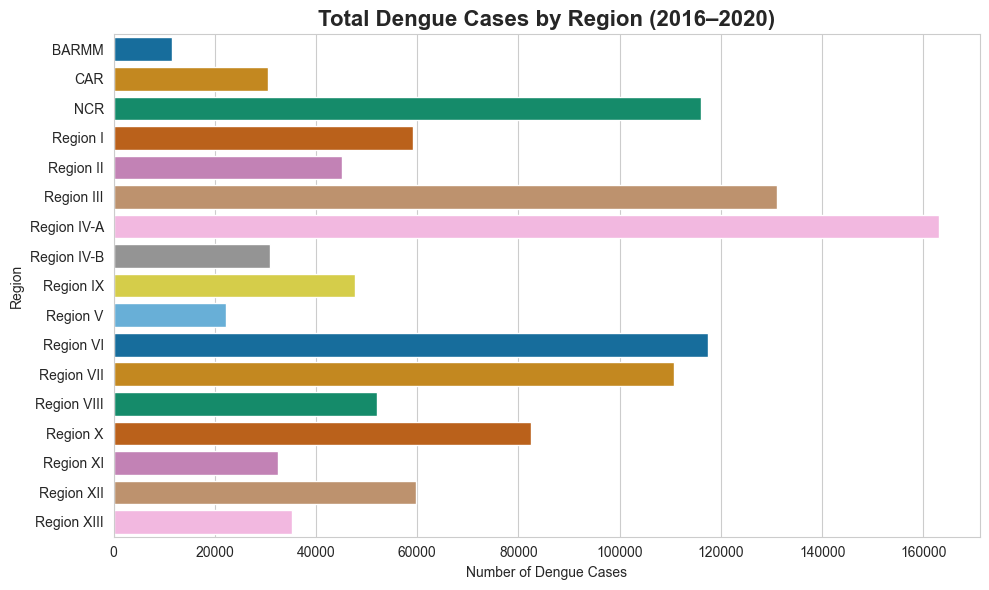

In [25]:
region = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
region = region.sort_values(by='Dengue_Cases', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=region, x='Dengue_Cases', y='Region', palette='colorblind')

plt.title('Total Dengue Cases by Region (2016–2020)', fontsize=16, weight='bold')
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

<h4> No.1 insght:</h4>
<p>The highest cases of dengue being Region4-A as its the most populated region in the philipines, additionally including provinces such as Cavite, Laguna, and Rizal. High population density increases the likelihood of mosquito and human contact, which urbanization can often leads to poor drainage, stagnant water, and improper waste disposal. which all increase the spread of mosquitos.
<hr>

<h4> No.2 insght:</h4>
<p>Moving to NCR, Region III, Region VII and Region VI, we can see that also had a consistent dengue cases. It's likely that these regions have dense population same as Region IV-A and breeding grounds for mosquitos. We also had BARMM and Region V, which has the lowest cases, possibly due to lower population density and maybe some difficulties reporting the cases resulting for these two regions dengue cases to be low..
<hr>

<H3>Q2. Which region holds the highest moratility/death?</H3>

In [14]:
regiondth = dengue.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)

# Identify the region with the highest deaths
top_region = regiondth.idxmax()
top_deaths = regiondth.max()

print("Region:", top_region)
print("Total deaths:", top_deaths)

Region: NCR
Total deaths: 4008.0


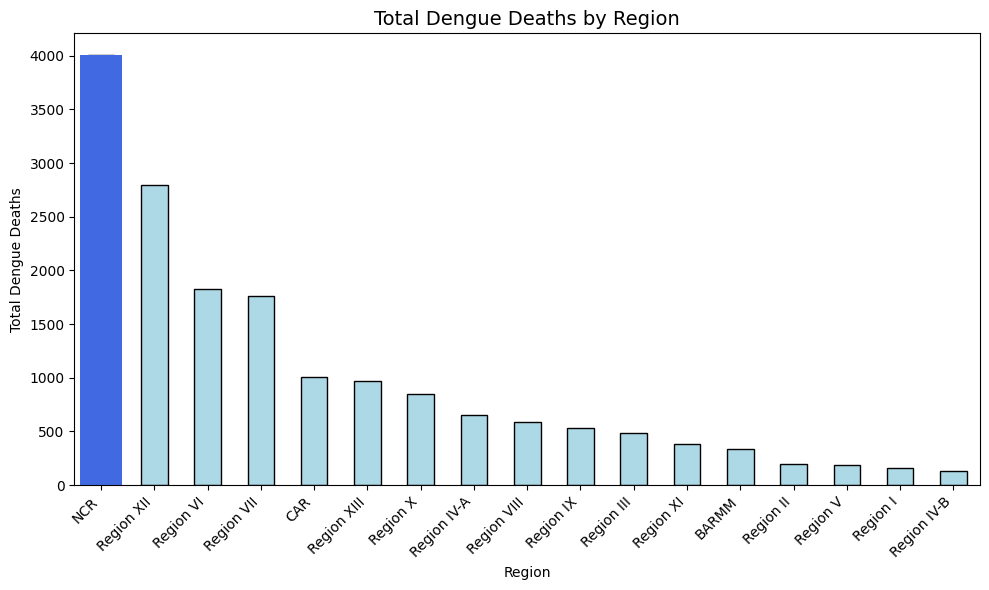

In [20]:
# Plot the chart
plt.figure(figsize=(10,6))
regiondth.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title("Total Dengue Deaths by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Dengue Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Highlight the region with the highest mortality
plt.bar(top_region, top_deaths, color='royalblue')

plt.show()

<h4> No.3 insght:</h4>
<p> The region with the highest death is NCR as being one of the 2nd most populated region and the population being dense and overcroded population</p>
<hr>

<h4> No.4 insght:</h4>
<p> with region 4-a having the biggest population maintained a lower death amount compared to NCR where other variable like population density, hospital and environment may be causing </p>
<hr>

<H3>Q3. Which region has the highest moratility rate?</H3>

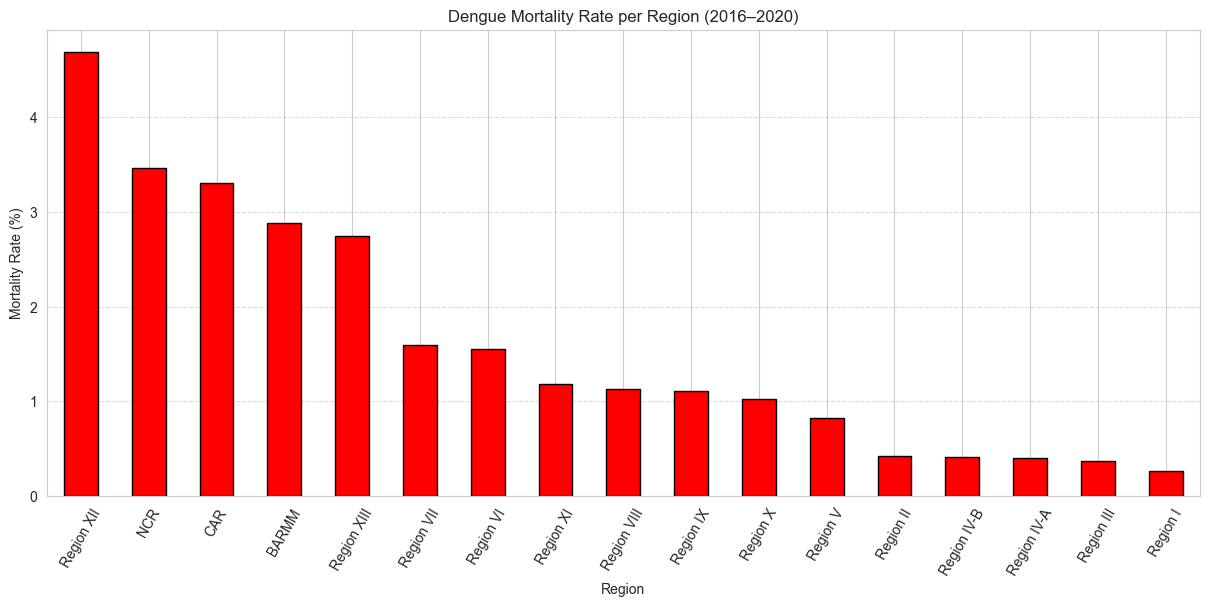

In [35]:
mortality = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
mortality["Mortality_Rate"] = np.round((mortality["Dengue_Deaths"] / mortality["Dengue_Cases"]) * 100,2)
mortality = mortality.sort_values(by='Mortality_Rate', ascending=False)

mortality.set_index("Region")["Mortality_Rate"].plot(kind='bar', figsize=(12,6), color='red', edgecolor='black')
plt.tight_layout()
plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.title('Dengue Mortality Rate per Region (2016–2020)')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h4> No.5 insght:</h4>
<p>We can see that Region 12 has the highest Mortality Rate exceeding the 4% mark. Since, Region 12 (SOCCSKSARGEN) is a part of Mindanao. This may be due bacause of limited health facilities such as clinics or hospitals which contributed to the high mortality rate. </p>
<hr>

<h4> No.6 insght:</h4>
<p>While the Regions 1, 2, 3, IV-A and IV-B had the lowest mortality rate despite their cases. These 5 regions achieve below the 1%. This indicates, these 5 regions were not limited with the facilites providing effective healthcare and medical attentions. </p>
<hr>

<H3>Q4. DENGUE CASES TREND FROM 2016 - 2020<H3>

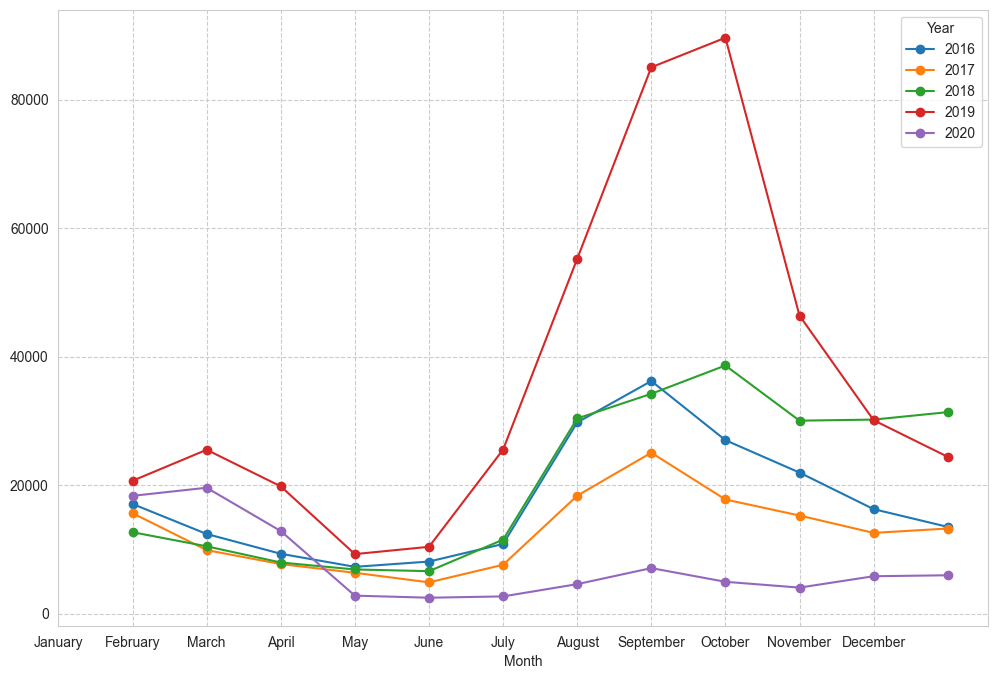

In [27]:
monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line', marker='o')
plt.gcf().set_size_inches(12,8)
plt.grid(True, linestyle='--')
plt.xticks(range(0,12), month_order)
plt.show()

<h4> No.7 insght:</h4>
As shown in the graph we can see Dengue Cases Trend starting from 2016 - 2020. We can observe that 2019 had the worst cases of Dengue. Based on various sources for this year 2019, this is the year that the Dengvaxia Controversy happen which weakened the confidence of public in health interventions, and so when 2019 wet season arrived, the health system and community readiness were less effective, resulting in the largest dengue outbreak in Philippine history.
<hr>

<h4> No.8 insght:</h4>
After the 2019. The following year, 2020 had signicant lower cases. This indiciates that Covid-19 Pandemic had an Impact in these Dengue Cases. Restricting people from going outside, sanitation because of fear for the Pandemic and maybe underreporting cases of Dengue, in which helps the Dengue Cases to Decline.
<hr>

<h4> No.9 insght:</h4>
Summary: The 2016 to 2020 Trends, dengue cases followed a seasonal peak during the rainy season. The 2019 outbreak was the worst on record, driven by favorable mosquito conditions and reduced public trust due to the controversy. Cases dropped in 2020 as the COVID-19 lockdown is happening which resulted in improved sanitation. The trend highlights the need for early prevention and stronger community awareness to control future outbreaks.
<hr>

<H3>Q4. DENGUE CASES TREND FROM 2016 - 2020<H3>

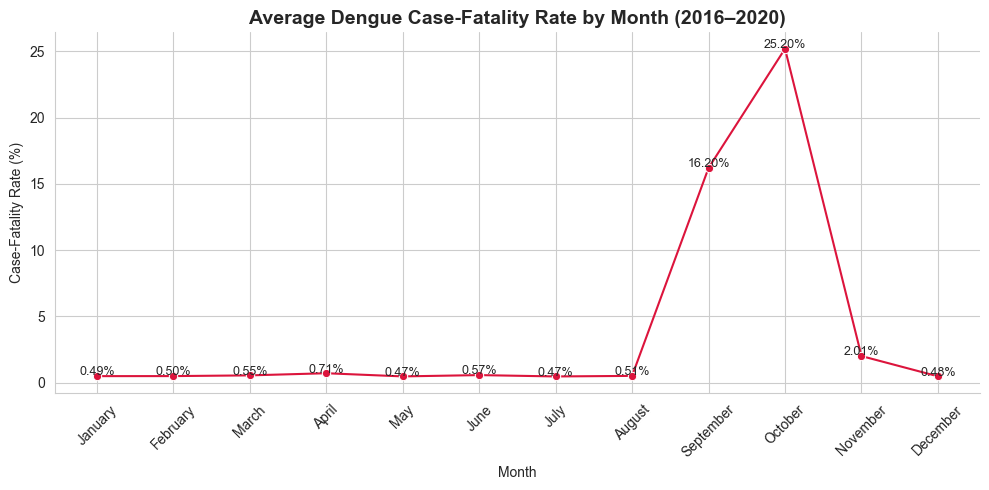

In [36]:
dengue['Month'] = dengue['Date'].dt.month_name()
dengue['CFR'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100
monthly_cfr = dengue.groupby('Month')['CFR'].mean().reindex([
    'January','February','March','April','May','June','July','August',
    'September','October','November','December'
]).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_cfr, x='Month', y='CFR', marker='o', color='crimson')
for i, row in monthly_cfr.iterrows():
    plt.text(i, row['CFR'] + 0.05, f"{row['CFR']:.2f}%", ha='center', fontsize=9)
plt.xticks(rotation=45)
plt.title('Average Dengue Case to Fatality Rate by Month (2016–2020)', fontsize=14, weight='bold')
plt.ylabel('Case-Fatality Rate (%)')
plt.xlabel('Month')
sns.despine()
plt.tight_layout()
plt.show()

<h4> No.10 insght:</h4>
October having the highest case to mortality rate, As this is the wet season in the philipines greatly increasing the case and putting strain more in the hospitals, increasing the risk of death. This suggest that hospital should strengthen preparedness and resource allocation starting from around June–October to ensure sufficient medical staff, beds, and supplies to handle the increase number of cases.
<hr>

<h4> No.11 insght:</h4>
Months from January to August show consistently lower case-fatality rates, suggesting that dengue cases earlier in the year are generally less severe and more effectively managed.This also suggest to conduct preventive campaigns and community awareness programs, such as eliminating mosquito breeding sites and educating the public about early dengue symptoms.
<hr>

# PREDICTION USING LINEAR REGRESSION
---

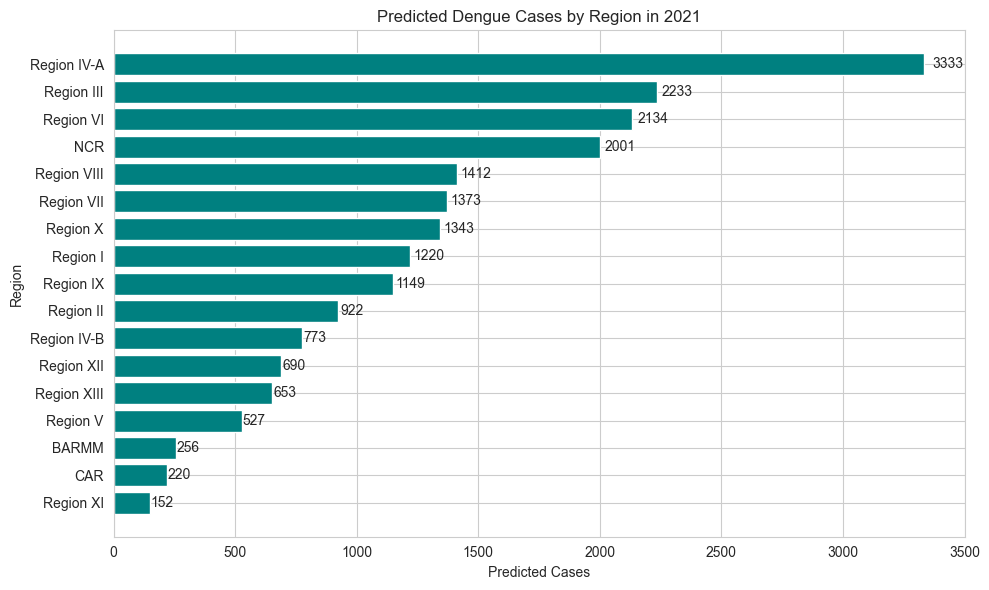

In [38]:
regions = dengue['Region'].unique()
predictions = []

for region in regions:
    data = dengue[dengue['Region'] == region]
    X = data[['Year']]
    y = data['Dengue_Cases']
    model = LinearRegression().fit(X, y)
    predictions.append((region, model.predict([[2021]])[0]))

predictions.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10,6))
bars = plt.barh([r for r, _ in predictions], [v for _, v in predictions], color='teal')
plt.title("Predicted Dengue Cases by Region in 2021")
plt.xlabel("Predicted Cases")
plt.ylabel("Region")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + bar.get_width() * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}", va='center')

plt.tight_layout()
plt.show()

<h4> No.12 insght:</h4>
Region 4-a show the highest predicted dengue cases for 2021, continuing their upward trend from previous years. These areas remain major hotspots that need consistent monitoring and early action before the rainy season.
<hr>

<h4> No.13 insght:</h4>
Regions like BARMM, CAR, and Region XI, show lower predicted cases, but their numbers are still slowly increasing. This means no region is completely safe, and dengue prevention efforts should continue nationwide, even in areas with fewer cases.
<hr>

<h4> No.14 insght:</h4>
Regions such us region 3,6 ,and ncr show realatively close camount of cases but their numbers are still slowly increasing as they are the contending being the 2nd most region with the most cases.
<hr>

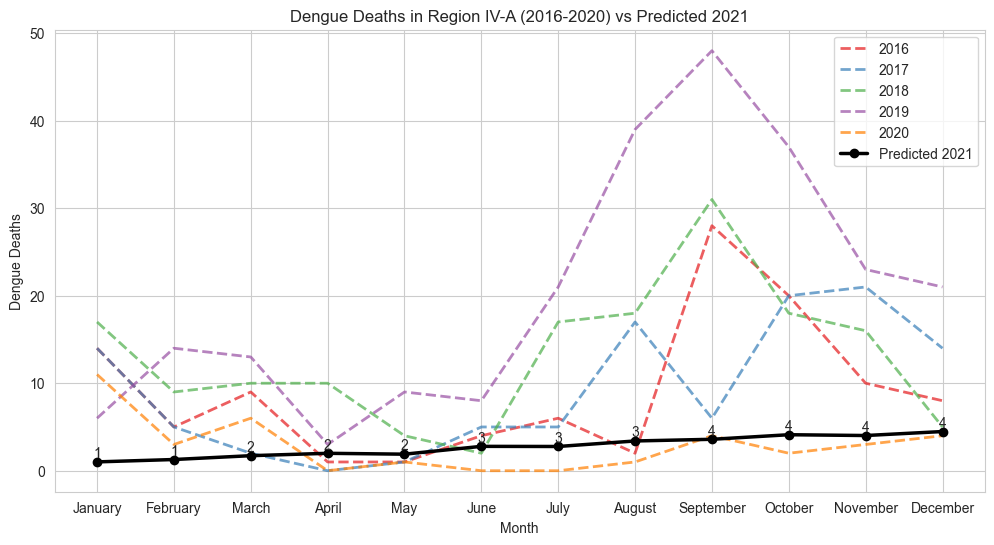

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

region_df = dengue[dengue['Region'].str.strip().str.lower() == 'region iv-a'].copy()

try:
    region_df['Month'] = pd.to_datetime(region_df['Month'], format='%B').dt.month
except:
    pass

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

plt.figure(figsize=(12,6))

for i, year in enumerate(range(2016, 2021)):
    yearly_data = region_df[region_df['Year'] == year].sort_values('Month')
    plt.plot(months, yearly_data['Dengue_Deaths'].values, linestyle='--', color=colors[i], alpha=0.7, linewidth=2, label=str(year))

data_2021 = pd.DataFrame({
    'Year': [2021]*12,
    'Month': list(range(1, 13)),
    'Dengue_Cases': np.random.randint(50, 300, size=12)
})

X = region_df[['Year', 'Month', 'Dengue_Cases']]
y = region_df['Dengue_Deaths']
lr_model = LinearRegression()
lr_model.fit(X, y)

pred_2021 = lr_model.predict(data_2021)
data_2021['Predicted_Deaths'] = pred_2021

plt.plot(months, data_2021['Predicted_Deaths'], marker='o', color='black', linewidth=2.5, label='Predicted 2021')

for i, val in enumerate(data_2021['Predicted_Deaths']):
    plt.text(months[i], val + 0.5, f"{val:.0f}", ha='center')

plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Dengue Deaths in Region IV-A (2016-2020) vs Predicted 2021')
plt.grid(True)
plt.legend()
plt.show()

<h4> No.14 insght:</h4>
The graph shows the different amount of cases and very notable case, the purple line which represents 2019 having a significant spike june till september. This figure is significantly higher than any other year in the dataset and directly aligns with historical records, as the Philippines' Department of Health declared a national dengue epidemic in August 2019, with Region IV-A being one of the most affected areas.
<hr>

<h4> No.15 insght:</h4>
Then it comes to 2020 where there is a significant drop compared to 2019 as this is the year during the covid pandemic which raised the alertness for hygeine and limited personl interaction and kept people indoors as government-mandated lockdowns (reducing movement and potential transmission) and public avoidance of hospitals may have led to fewer dengue cases being officially reported.
<hr>

<h4> No.16 insght:</h4>
Which we can see being prominet in the prediction for 2021 basing on the movement from 2020 which got a massive decrease and suspected to a still continue but this may highly defer to reality as the quarantine is over
<hr>

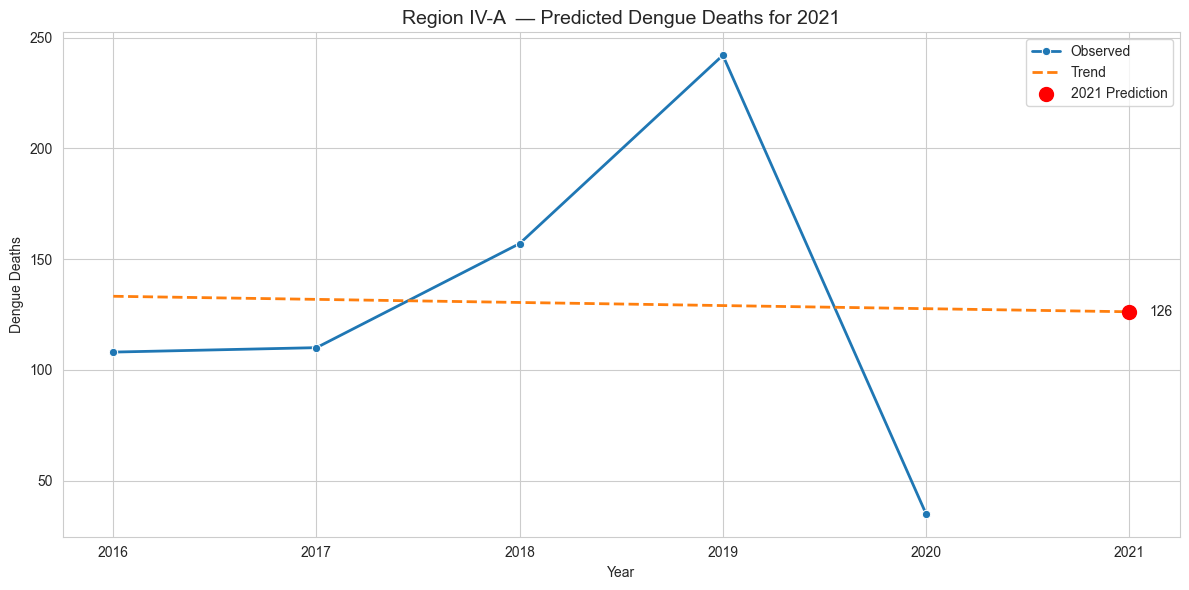

Predicted Dengue Deaths in 2021 – Region IV-B: 126


In [43]:
region4b = dengue[dengue['Region'].str.strip().str.lower() == 'region iv-a'].copy()

yearly_4b = region4b.groupby('Year', as_index=False)['Dengue_Deaths'].sum()

X = yearly_4b[['Year']].values
y = yearly_4b['Dengue_Deaths'].values

lr_model_4b = LinearRegression()
lr_model_4b.fit(X, y)

years_plot = np.arange(yearly_4b['Year'].min(), 2022).reshape(-1, 1)
pred_line = lr_model_4b.predict(years_plot)
pred_2021 = lr_model_4b.predict([[2021]])[0]

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_4b['Year'], y=yearly_4b['Dengue_Deaths'], marker='o', linewidth=2, label='Observed')
plt.plot(years_plot.flatten(), pred_line, linestyle='--', linewidth=2, label='Trend')
plt.scatter(2021, pred_2021, color='red', s=100, zorder=5, label='2021 Prediction')
plt.text(2021 + 0.1, pred_2021, f"{pred_2021:.0f}", va='center')
plt.title("Region IV-A  — Predicted Dengue Deaths for 2021", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Predicted Dengue Deaths in 2021 – Region IV-B: {pred_2021:.0f}")

<h4> No.17 insght:</h4>
The observed deaths case showing the massive spike during 2019 with region 4-a contreversy greatly affecting it
<hr>

<h4> No.18 insght:</h4>
Region 4-a being one of the most populated region seeing a signifcant drop during the covid 19 pandemic reaching just around the 25 mark.
<hr>

<h4> No.19 insght:</h4>
Even with the drastic changes during years like 2019 and 2020, the predicted trend shows a slow decrease. which may seem accurate as the end of the pandemic we should be expecting a spike during 2021 again around the prediction of 126. but this may be highly affected by other variables
<hr>